In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
## 2D array
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5] # 1D Array

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[5]

'dog'

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

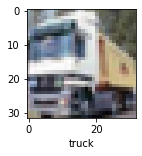

In [ ]:
plot_sample(X_train,y_train,1)

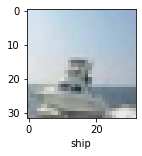

In [ ]:
plot_sample(X_train,y_train,100)

In [ ]:
## Now we have to normalize the data
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
## perform ann
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'sigmoid')
])

In [ ]:
ann.compile(optimizer = 'SGD', loss = "sparse_categorical_crossentropy" , metrics = ['accuracy'])

In [ ]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.8134 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.6237 - accuracy: 0.4255
Epoch 3/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.5385 - accuracy: 0.4543
Epoch 4/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4814 - accuracy: 0.4766
Epoch 5/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.4298 - accuracy: 0.4963


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 9s 26ms/step - loss: 1.4598 - accuracy: 0.4771


[1.4598010778427124, 0.4771000146865845]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 8s 26ms/step


In [ ]:
print("Classification Report : \n",classification_report(y_test,y_pred_classes))
## Give precision and recall of each of the classes

Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.39      0.49      1000
           1       0.68      0.54      0.61      1000
           2       0.35      0.43      0.39      1000
           3       0.34      0.30      0.32      1000
           4       0.44      0.36      0.40      1000
           5       0.44      0.29      0.35      1000
           6       0.55      0.50      0.52      1000
           7       0.42      0.67      0.52      1000
           8       0.46      0.78      0.58      1000
           9       0.60      0.49      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [ ]:
## Use Convolution Neural Network
cnn = models.Sequential([
    layers.Conv2D(filters = 32,kernel_size = (3,3), activation ='relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64,kernel_size = (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),

    #Dense layers
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax'),
])

In [ ]:
cnn.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4722 - accuracy: 0.4677
Epoch 2/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1249 - accuracy: 0.6048
Epoch 3/5
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9908 - accuracy: 0.6550
Epoch 4/5
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9012 - accuracy: 0.6890
Epoch 5/5
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8397 - accuracy: 0.7087


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9436 - accuracy: 0.6773


[0.9436008930206299, 0.677299976348877]

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

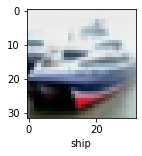

In [ ]:
plot_sample(X_test,y_test,1)

In [ ]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 4s 14ms/step


In [ ]:
y_pred[:5]

array([[1.5606927e-03, 1.9206315e-04, 6.9321063e-03, 8.4858167e-01,
        1.0116177e-03, 1.2470221e-01, 3.8189525e-03, 7.2823383e-04,
        1.2011889e-02, 4.6065467e-04],
       [3.2635450e-02, 1.0520325e-01, 7.9879192e-06, 2.4051242e-06,
        1.6302246e-06, 7.1411711e-07, 9.3618553e-08, 6.4242749e-07,
        8.5928041e-01, 2.8675790e-03],
       [6.5544128e-02, 3.0898815e-01, 3.9055224e-03, 5.6064758e-03,
        1.4506169e-03, 2.5670205e-03, 4.1382379e-04, 3.7274663e-03,
        5.5634087e-01, 5.1455978e-02],
       [7.5778532e-01, 6.1685992e-03, 2.1057562e-03, 4.9397408e-04,
        6.3554471e-04, 3.2475837e-05, 1.3389418e-04, 1.1244926e-05,
        2.3196878e-01, 6.6448597e-04],
       [4.5795673e-06, 3.8073613e-05, 3.5701994e-02, 7.7609263e-02,
        4.7589076e-01, 6.1099607e-02, 3.4938017e-01, 9.7129479e-05,
        1.4540758e-04, 3.3016655e-05]], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

3

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

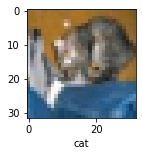

In [ ]:
plot_sample(X_test,y_test,0)

In [ ]:
classes[y_classes[0]]

'cat'